In [1]:
%load_ext autoreload
%autoreload 2

from ryn.common import helper
helper.notebook()

changing directory


In [2]:
from ryn.graphs import split
from ryn.graphs import loader

g = loader.load_graphs_from_uri('oke.fb15k237-trainvalidtest')[0]
print(f'loaded {g.str_stats}')

rels = split.Relation.from_graph(g)
rels.sort(key=lambda rel: rel.ratio)
print(f'retrieved {len(rels)} relations')

loaded ryn graph: oke.fb15k237-trainvalidtest
  nodes: 14541
  edges: 310116 (237 types)
  degree:
    mean 42.65
    median 26

retrieved 237 relations


In [5]:
from tabulate import tabulate

rows = [(i, r.r, r.ratio, len(r.hs), len(r.ts), r.name) for i, r in enumerate(rels, 1)]

N = 10

print(f'first {N}')
print(tabulate(rows[:N]))

# print(f'mid {N}')
# m = len(rows) / 2
# print(tabulate(rows[int(m-N/2):int(m+N/2)]))

# print(f'last {N}')
# print(tabulate(rows[-N:]))

first 5
-  ---  -----------  ----  -  ---------------------------------------------------------------------------------------------------
1   25  0.000229148  4364  1  /common/topic/webpage./common/webpage/category
2   43  0.000441501  4530  2  /people/person/gender
3  120  0.0010352     966  1  /location/hud_foreclosure_area/estimated_number_of_mortgages./measurement_unit/dated_integer/source
4   85  0.00119976   3334  4  /people/person/spouse_s./people/marriage/type_of_union
5  118  0.0020284     493  1  /user/tsegaran/random/taxonomy_subject/entry./user/tsegaran/random/taxonomy_entry/taxonomy
-  ---  -----------  ----  -  ---------------------------------------------------------------------------------------------------


In [25]:
N, M = 150, 5

whitelist = set(('/film/film_subject/films', ))

#gen = rels[:N]
gen = [r for r in rels if r.name in whitelist]

for i, r in enumerate(gen, 1):
    print(f'\n{i=} {r.ratio:2.4f} {r.name[:100]}')
    ents = r.hs if len(r.hs) < len(r.ts) else r.ts
    for e in list(ents)[:M]:
        print('    ', g.source.ents[e])


i=1 0.2879 /film/film_subject/films
     Vietnam War
     19th century
     Gulf War
     Margaret Thatcher
     bisexuality


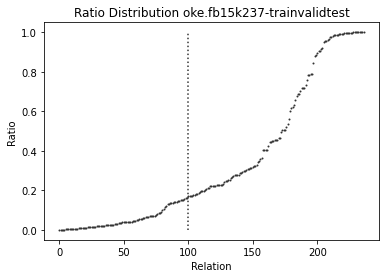

In [23]:
import ryn
from ryn.common import plotter

path = ryn.ENV.SPLIT_DIR / f'{g.name}.ratio'
path.parent.mkdir(exist_ok=True, parents=True)

plt = plotter.Plotter(title=f'Ratio Distribution {g.name}', xlabel='Relation', ylabel='Ratio', fname=str(path))
plt.ax.scatter(range(len(rels)), [r.ratio for r in rels], color=plotter.CLR[0], s=1)
plt.ax.vlines(100, 0, 1, color=plotter.CLR[0], linestyle='dotted')

print()
plt.plot()
print()